In [1]:
import numpy as np
import pandas as pd
## ppm ##
basedir="/Users/calvin/Documents/FAPERJ/python/"
dire="Aline_Urina_etapa1/"
text='Tamp. Fosf 150mM pH 7,4 - Urina - 300K - TSP 5.8mM'

metab=[['TMS', 0.0, -0.5, 0.5, -0.7, 0.7,1,'-$3(CH_3)$'], #0
       #['Lipids1', 0.8776, 0.85, 0.9, 1, 0.75, 1, '-$peak_1$'],#1*
       ['Valine', 1.0508, 1.0490, 1.0550, 1.029, 1.058, 6,'-$2(CH_3)$'],#2*
       ['2-Methylglutarate', 1.1054, 1.1012, 1.1072, 1.0940, 1.1247,3,'-$CH_3$'], #3 Methyl succinato ou 2-Methylglutarate
       ['Propylene Glycol', 1.1404, 1.1340, 1.1430, 1.1290, 1.1590, 3,'-$CH_2$'],#4*
       ['Ethanol', 1.1751, 1.1712, 1.1766, 1.1625, 1.2089,3,'-$CH_3$'],#5
       ['3-Hydroxybutirate', 1.1918, 1.1837, 1.1953, 1.1745, 1.2145,3,'-$CH_3$'], # 6 - Pode ser 3-aminoisobutyrate
       ['Methylmalonate', 1.2363, 1.2256, 1.2486, 1.2124, 1.2502,3,'-$CH_3$'], #7 
       ['3-Hydroxyisovalerate', 1.2749, 1.2687, 1.2788, 1.2660, 1.2834,6,'-$2(CH_3)$'], #8
       ['Lactate', 1.3388, 1.3264, 1.34, 1.3130, 1.3536,3,'-$CH_3$'], #9
       ['2-Hydroxyisobutyrate', 1.3653, 1.36, 1.3677, 1.3553, 1.3740,6,'-$2xCH_3$'],  #10
       ['Alanine',1.48785, 1.47, 1.49, 1.4787, 1.5069,3,'-$CH_3$'], #11
       ['Acetate', 1.92334, 1.9192, 1.9263, 1.9, 1.94, 3,'-$CH_3$'],#12*
       ['N-acetylglucosamine', 2.0435, 2.0377, 2.0515, 2.025, 2.065,3,'-$CH_3$'],#13*
       ['Lipids2', 2.0435, 2.0377, 2.0515, 1.959, 2.2, 1,'-$peak_2$'],#14*
       ['Citrate1', 2.5287, 2.5148, 2.5396, 2.5063, 2.5804,2,'-$CH_2-peak_1$'], #15
       ['Piruvate', 2.3458, 2.3363, 2.35, 2.3204, 2.3606,3,'-$CH3$'], #16*
       ['Carnitine', 2.4088, 2.4001, 2.4144, 2.391, 2.4293, 9,'-$N-(3x)CH_3$'],#17*
       ['Citrate2', 2.6746, 2.6596, 2.6833, 2.6490, 2.7060,2,'-$CH_2-peak_1$'], #18
       ['Sarcosine', 2.7279, 2.7215, 2.7333, 2.7181, 2.7406,3,'-$CH_3$'], #19 -Pode ser dimethylamine
       ["Creatinine",3.04436,3.0258,3.06, 3.0214, 3.075,3,'-$CH_3$'], #20
       ['Acetylcholine-Choline', 3.2069, 3.2023, 3.2114, 3.1998, 3.2165, 9,'-$N-(3x)CH_3$'],#21*
       ['Methanol', 3.3674, 3.3648, 3.3687, 3.3603, 3.3700, 3,'-$CH_3$'],#22*
       ['Ethanol', 3.6596, 3.6412, 3.6645, 3.6352, 3.70,2,'-$CH_2$'],#23
       ['Creatine', 3.908, 3.89, 3.92, 3.85, 3.93,2,'-$CH_2$'],#24
       ['Creatinine2',4.04, 4.038, 4.07, 4.0259, 4.06,2,'-$CH_2$'],#25
       ['Lactate', 4.1143, 4.1076, 4.1156, 4.0857, 4.1563, 1,'-$CH$'],#26*
       ['Trigoneline', 4.4429, 4.40, 4.463, 4.3, 4.5,3,'-$CH_3$'],#27
       ['Glucose',5.25, 5.24, 5.26, 5.22, 5.31,2,'-$CH2$'], #28
       ['Urea', 5.794, 5.695, 5.92, 5.6391, 6.0631,4,'-$NH_{2_2}$'], #29  
       ['Phenyl-alanine',7.4133, 7.4,7.44,7.3853, 7.4379,2,'-$CH_2$'], #30
       ["Hippurate1",7.55340,7.52,7.59, 7.5117, 7.591,2,'-$CH_2$'], #31
       ['Hippurate2', 7.8295,7.8245, 7.831, 7.5, 8,2,'-$CH_2$'],# 32
       ['Formate', 8.4656, 8.4622, 8.4705, 8.4586,8.4873,1,'-$CH$'],#33
       ['TMS_calib', 0.0, -0.02, 0.02, -0.5, 0.5,1,'-$CH_{3_3}$'],#34
       ['TMS', 0.0, -0.5, 4.3, -0.5, 4.3,1,'-$full 4ppm PCA$'] #35
      ]
## Controle - Escolha do metabolito, ver números na frete dos metabolitos

## Contruindo um metabolito novo
#metabolito=metab[mt][0] - Nome do metabolito
#aln=metab[mt][1] ## centro do pico
#xmin=metab[mt][2] ## faixa de variação abaixo - pegar do alinhamento do topspin
#xmax=metab[mt][3] ## faixa de variação acima - pegar do alinhamento do topspin
#rmin=metab[mt][4] ### faixa para apresentar na tela mais a direita
#rmax=metab[mt][5] ### faixa para apresentar na tela mais a esquerda
#nuclei=metab[mt][6] ### qtos nucleos geram o sinal
#chemgroup=metab[mt][7] ### qtos nucleos geram o sinal
dados_totais=pd.DataFrame([])
corr=0.58e-03 ## 70ul 5.8mM TSP + 630 Urine, 10x Dilution



# Open 1r

Open all 1r @ samples with **exp=1** and **process=1** using **NMRGLUE PACKAGE**
Reference all 1r file from **procs** and **acqus** from sample directory

## Calibrate all spectra using (sr)


In [2]:
import nmrglue as ng
import sys
import numpy as np
import pandas as pd
#%matplotlib qt
import matplotlib.pyplot as plt
import os

samples = len(os.listdir(str(basedir)+str(dire)))

this = sys.modules[__name__] # this is now your current namespace

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx # or array[idx]


i = 1
df = pd.DataFrame([])
yarr=[]

xarr=[]
#samples=
## set the number of 1r files to open, always open first processed spectra ##
#samples=5
while i < samples+1:
    name=str(basedir)+str(dire)+str(i)+"/pdata/1"
    dic, data= ng.bruker.read_pdata(name)
    with open(str(basedir)+str(dire)+str(i)+'/pdata/1/title') as f:
        title = f.read()
        f.close()
    sf=float(dic["procs"]["SF"])    
    sfo1=float(dic["acqus"]["SFO1"])  
    o1=float(dic["acqus"]["O1"])
    hzppt=float(dic["acqus"]["SW_h"])/len(data)
    swh=float(dic["acqus"]["SW_h"])
    sr=o1+(sf-sfo1)*1000000.
    
    pts=int(sr//hzppt) # Calc pts to Calibrate 0ppm to Xscale
    data = ng.proc_base.rev(data)#/corr    # reverse the data
    
    #### scale x from pts to ppm ###
    ## Bin size for PCA##
    
    si=len(data) 
    xs=[]
    
    for j in range(0-pts,si-pts):
        hz=float(((o1-swh/2)+(hzppt*(j)))/sf)
        xs+=[hz]
    xs = np.asarray(xs)
    xmin=xs.min()
    xmax=xs.max()
    xbin=0.05
    k=1
    f=0
    a={}
    for j in np.arange(xmin,xmax, xbin): 
        f=j+xbin
        fpos=find_nearest(xs, f)
        jpos=find_nearest(xs, j) 
        peak = data[jpos:fpos]
        a[k]=peak.sum()
        k+=1
    n=np.arange(xmin,xmax, xbin)
    
    if title=="\n":
        title=i
    b=pd.Series(a, name=title+'.'+str(i))
    df =pd.concat([df, b.to_frame().T])
    # Antigo formato para fazer append no python 
    #df = df.append(b)
    yarr.append(data)
    xarr.append(xs)
    i += 1 ## index for number of spectra
#df.to_csv("urina.csv")
print("OK")

OK


In [3]:
print(si)
xarr=np.array(xarr)
xarrc=xarr
print(type(xarr), xarr.shape)

65536
<class 'numpy.ndarray'> (122, 65536)


In [4]:
del a,b,dic,f,fpos,hz,hzppt,i,j,jpos,k,name, o1,peak, pts,sf, sfo1,sr,swh
# retirando da memória variveis que não vão mais ser utilizadas

In [5]:
#df
## verificando as colunas

In [6]:
#ajust index of columns to ppm
ppm=[]
for j in np.arange(xmin,xmax, xbin):
    #print(j)
    ppma=str(round(j, 5))
    ppm.append(ppma)
df.columns = [ppm]
### Range of spectra, without noise and water signal
#bfh2o=df.iloc[:,0:156]
#afh2o=df.iloc[:,167:254]
#result = pd.concat([bfh2o, afh2o], axis=1)
result=df

In [7]:
#del ppma, ppm
df

-3.21274      -3.16274      -3.11274      -3.06274  \
ZMS;sim.1     -52631.011719 -30763.812500 -19732.898438 -18976.289062   
DJB;sim.2      30053.921875   6866.218750  -2207.429688   3779.484375   
JSF;nao.3     -15002.546875  -7948.656250  -9807.187500   1394.421875   
SER;sim.4     -98170.861328 -63864.435547 -54756.689453 -38070.021484   
APRS;nao.5    -24694.697266  -9147.429688 -11012.207031  -8879.810547   
...                     ...           ...           ...           ...   
RS;nao.118     -7071.351562   3188.281250  -1083.593750  -1171.015625   
SBS;nao.119    -4450.722656  -8737.480469  -5928.869141  -1132.951172   
ALRO;nao.120  -19501.687500 -13505.031250 -10887.117188  -7828.701172   
RGH;nao.121    11107.863281   4935.253906   2683.035156  -5546.050781   
SDMMO;nao.122 -72873.890625 -44704.433594 -30875.410156 -22743.574219   

                   -3.01274      -2.96274      -2.91274      -2.86274  \
ZMS;sim.1     -26182.949219 -10879.171875  -7466.855469 -14300.789062   
DJB;sim.2     -11635.812500  -9216.125000  -4594.539062 -10747.734375   
JSF;nao.3       3754.328125  -8145.234375   3365.437500    275.312500   
SER;sim.4     -26068.578125 -32655.082031 -21706.949219 -10280.160156   
APRS;nao.5     -2727.078125  -7611.966797   7360.515625   1206.542969   
...                     ...           ...           ...           ...   
RS;nao.118     -9178.757812   1832.140625  -2220.343750   2266.828125   
SBS;nao.119    -7651.238281  -5804.460938  -7324.954102  -6020.826172   
ALRO;nao.120   -3813.998047  -9493.666016   1188.929688   2174.300781   
RGH;nao.121   -21711.765625 -15867.132812 -11193.308594 -24922.957031   
SDMMO;nao.122 -27582.765625 -33688.003906 -23482.128906 -23117.707031   

                   -2.81274      -2.76274  ...      12.28726      12.33726  \
ZMS;sim.1     -12741.054688  -6626.457031  ... -18509.175781 -21663.277344   
DJB;sim.2        768.273438  -8765.117188  ...  -7041.882812 -13382.210938   
JSF;nao.3      -8322.656250  -2503.203125  ...   3629.390625  -3150.531250   
SER;sim.4     -32682.427734 -17072.968750  ... -13744.091797 -22464.808594   
APRS;nao.5     -3516.615234  -2703.671875  ...  -2392.554688   7060.671875   
...                     ...           ...  ...           ...           ...   
RS;nao.118      5655.687500   3156.500000  ...   1198.304688   2519.390625   
SBS;nao.119    -2051.365234  -7824.030273  ...  -3291.307617 -12723.071289   
ALRO;nao.120   11898.880859   -527.312500  ...  -9641.857422  -9677.429688   
RGH;nao.121   -12831.507812  -4843.046875  ...  -5270.285156  -4132.777344   
SDMMO;nao.122 -18223.492188 -21688.320312  ... -12779.312500 -11659.777344   

                   12.38726      12.43726      12.48726      12.53726  \
ZMS;sim.1     -29722.097656 -26710.199219 -32487.207031 -30802.414062   
DJB;sim.2        435.648438 -16545.640625  -7925.140625   -835.367188   
JSF;nao.3       2489.000000  -2613.031250  -5804.062500  -3504.656250   
SER;sim.4     -17269.039062 -20478.046875 -10309.455078 -16654.603516   
APRS;nao.5     12838.792969   4548.810547  -1974.566406  11531.457031   
...                     ...           ...           ...           ...   
RS;nao.118      2635.773438   5040.187500   1829.820312   3848.914062   
SBS;nao.119    -3729.636719 -12212.871094  -7873.642578  -5322.860352   
ALRO;nao.120    7120.162109   1197.677734  -7331.496094   5588.103516   
RGH;nao.121    -1725.046875  11611.355469   4668.128906   4715.617188   
SDMMO;nao.122  -2238.390625 -24243.601562  -1301.800781 -12676.597656   

                   12.58726      12.63726      12.68726      12.73726  
ZMS;sim.1     -31466.847656 -64085.550781 -75466.781250 -91015.437500  
DJB;sim.2       -256.359375   4693.468750  34757.445312  39871.960938  
JSF;nao.3      -8494.265625 -13136.828125 -21900.062500 -17999.500000  
SER;sim.4     -18091.853516 -36534.054688 -54063.876953 -82623.654297  
APRS;nao.5      4586.484375     96.814453 -17379.378906 -17287.476562  
...                

In [8]:
print(metab[33][2],metab[33][3])
ppm=np.array(ppm)
print(len(ppm))
fpos=find_nearest(xarrc[96], metab[33][2])
print(metab[33][2],fpos)
jpos=find_nearest(xarrc[96], metab[33][3])
print(metab[33][3],jpos)
peakt=yarr[96][fpos:jpos]
total=peakt.sum()
#pp=arry[13117:13327,96]
#ss=pp.sum()
#print(ss)
print(total)

-0.02 0.02
320
-0.02 13141
0.02 13305
100883.34765625


(-1000.0, 6000.0)

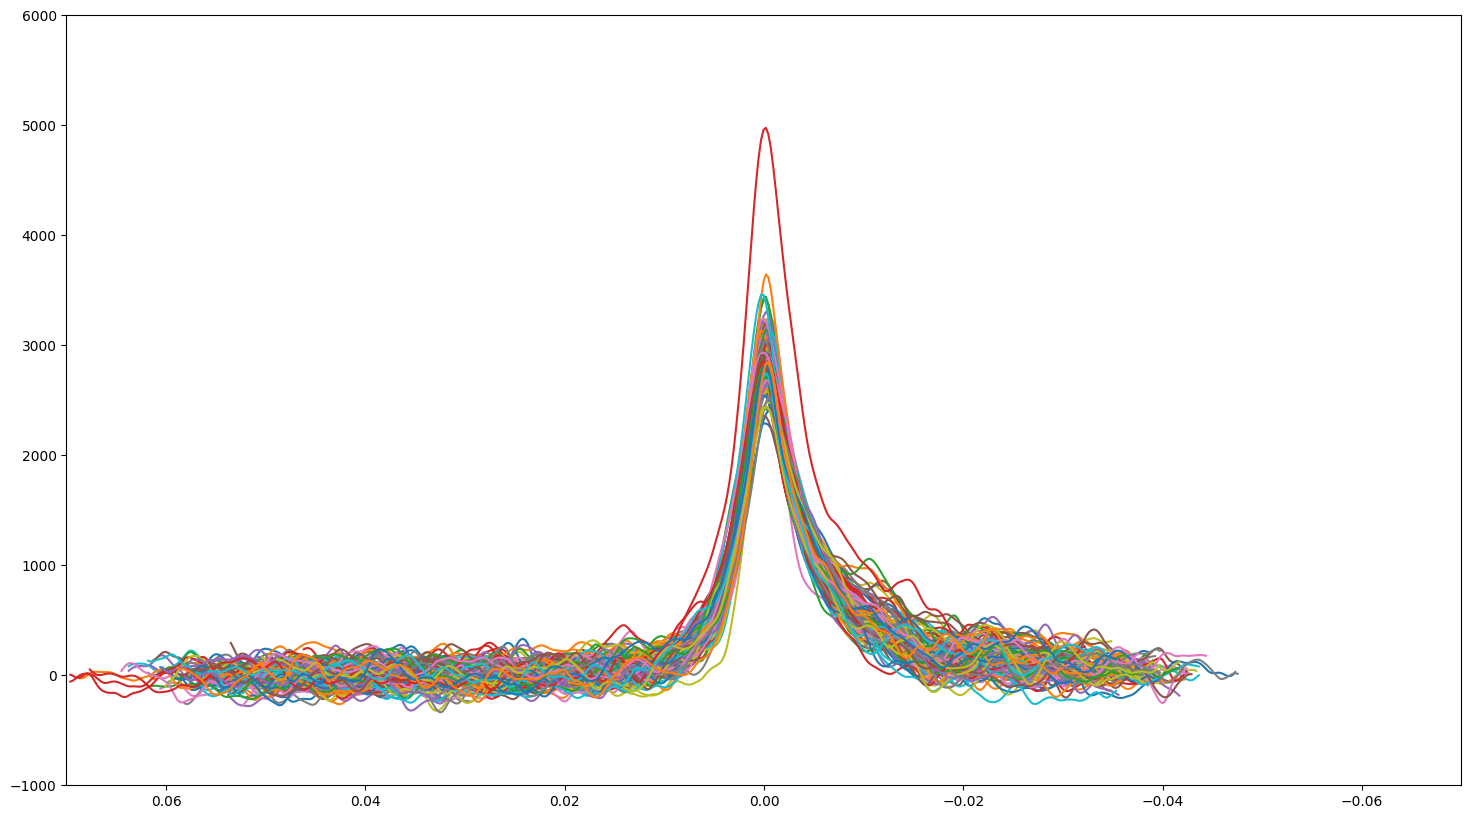

In [9]:
sa=samples
metabolito=" xx "
mt=33
xarrc=np.array(xarrc)
yarr=np.array(yarr)
arrx = xarrc.reshape(sa,si).T
arry = yarr.reshape(sa,si).T
#print(arrx.shape)
scalemim=arry.min()/100
scalemax=arry.max()/100
gridsize = (10, 10)
fig = plt.figure('PCA '+metabolito, figsize=(18, 10))


ax2 = fig.add_subplot() 
#ax2 = plt.subplot2grid(gridsize, (0,0), colspan=10, rowspan=10) ## 2D Spectra
ax2.plot(arrx[fpos-100:jpos+100,:],arry[fpos-100:jpos+100,:])
ax2.set_xlim(metab[mt][3]+0.05, metab[mt][2]-0.05)
ax2.set_ylim(-1000,6000)




In [10]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import Legend
from bokeh.models import Arrow, NormalHead, OpenHead, VeeHead, Label
HoverTIPS = [ ("value", "@image"),
    ("(Peak in ppm)", "$x"),
    ("Intensity", " $y"),
      
]



p = figure(width=1024, height=768,x_range=(1, -1), y_range=(-1000, 6000),tools="pan, box_select,box_zoom,wheel_zoom,undo,redo,reset,save,hover",
           tooltips=HoverTIPS,)
p.line(xarrc[:][96],yarr[:][96], line_width=1)
show(p)

In [11]:
for jn in np.arange(28,34, 1):
    mt=jn
    nuclei=metab[mt][6]
    %run ./Aline_Urina_Metabolitos_p2.ipynb
    dados_totais[metab[jn][0]]=dt
    print(jn,"--->",metab[jn][0], "--->",nuclei)
print('finish')

28 ---> Urea ---> 4
29 ---> Phenyl-alanine ---> 2
30 ---> Hippurate1 ---> 2
31 ---> Hippurate2 ---> 2
32 ---> Formate ---> 1
33 ---> TMS_calib ---> 1
finish


In [12]:
print(type(dados_totais))

<class 'pandas.core.frame.DataFrame'>


In [13]:
dados_totais
import plotly.express as px
# Seaborn, useful for graphics
import seaborn as sns
result3= dados_totais.sum(axis=1)
resultm=result3.mean()

fig = px.bar(dados_totais/resultm)
fig.add_hline(y=resultm/resultm,line_color='red')
fig.update_layout(title=text,
                   xaxis_title=metabolitot,
                   yaxis_title='u.a. integral',
                 showlegend=False)
fig.show()
file='html/media_'+str(metabolito)+'.html'
fig.write_html(file)

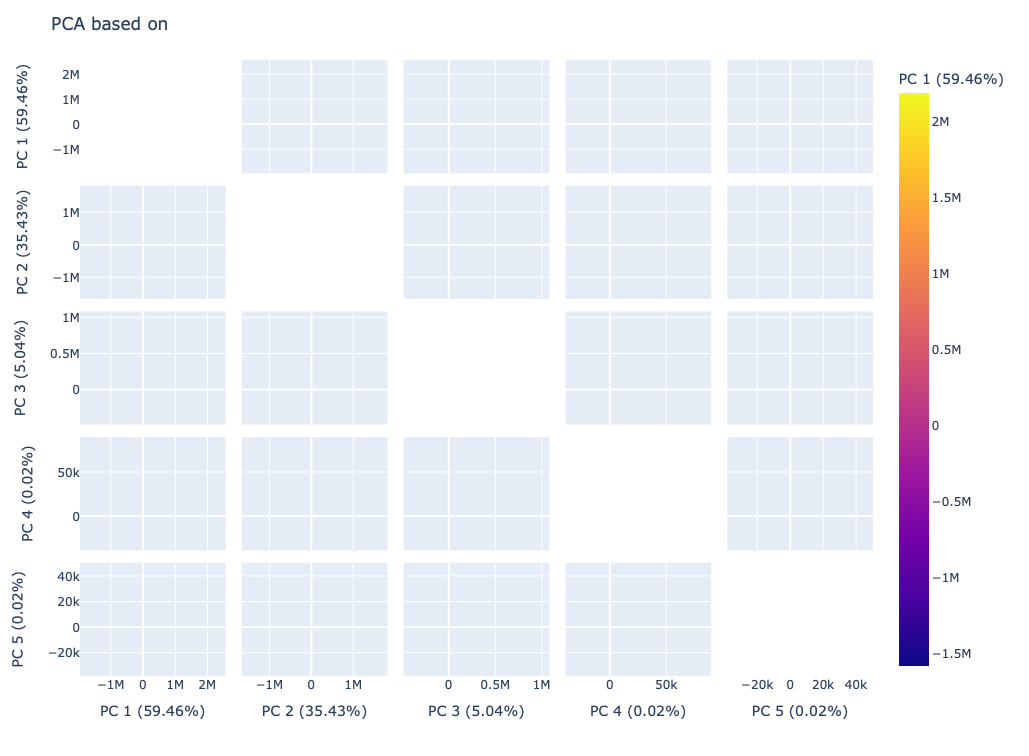

In [14]:
import scipy, random
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import  PCA
import plotly.express as px
# Seaborn, useful for graphics
import seaborn as sns

df = dados_totais
npca=5
pca = decomposition.PCA(n_components = npca)
#scaler = StandardScaler()
#scaler.fit(df)
#df = scaler.transform(df)
pcaFit = pca.fit(df)
symbol=result.index
components = pca.fit_transform(df)
labels = {
    str(i): f"PC {i+1} ({var:.2f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
hname=result.index


fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(npca),
    hover_name=hname,
    #symbol=symbol,
    color=0
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='PCA based on ',
    width=1344,
    height=756,
)
fig.show()
file='pca_dados_totais.html'
fig.write_html(file)

In [15]:
aln=metab[mt][1]
xmin=metab[mt][2]
xmax=metab[mt][3]
metabolito=metab[mt][0]
metabolitot=str(metabolito)+" aligned@"+str(aln)+" ppm"


rmax=metab[mt][5]-metab[mt][1]
rmin=metab[mt][1]-metab[mt][4]

## Bin size for PCA##
xbin=((metab[mt][5])-(metab[mt][4]))/5

df = pd.DataFrame([])
i=0
while i < samples:
    fpos=find_nearest(xarr[i], xmin)
    jpos=find_nearest(xarr[i], xmax)
    
    ymax=yarr[i][fpos:jpos].max()
    xxmax=find_nearest(yarr[i][fpos:jpos], ymax)
    xc=xarr[i][fpos:jpos][xxmax]-aln # (citrate 2)
    
    xarr[i]=xarr[i]-xc
    

    k=1
    f=0
    a={}
    for j in np.arange(metab[mt][4],metab[mt][5], xbin): 
        f=j+xbin
        fpos=find_nearest(xarr[i], f)
        jpos=find_nearest(xarr[i], j)
        peak = yarr[i][jpos:fpos]
        a[k]=peak.sum()
        k+=1
    b=pd.Series(a, name=result.index[i])
    df =pd.concat([df, b.to_frame().T], ignore_index=True)
    
    
    i += 1 ## index for number of spectra

df
result2=df
print(df)

                1             2              3             4              5
0   -36634.960938 -21798.582031  121124.226562 -46364.695312   38684.039062
1   -38409.078125 -28317.359375  119111.125000 -26050.953125    9668.773438
2     4756.578125   2744.390625  159245.500000  25060.921875   50428.375000
3     -984.732422   3938.056641  141705.242188  60119.818359  108288.251953
4     9760.162109  38003.238281  128900.582031  53619.259766   88123.341797
..            ...           ...            ...           ...            ...
117  22515.617188  34444.554688  136598.296875  52720.132812   64750.070312
118  -4135.601562  12817.565430  114068.755859  37077.037109   28442.857422
119  -8727.808594 -13749.974609  137583.480469  -7570.167969   37572.322266
120 -22820.593750   6316.644531  138764.253906  12199.789062   25715.125000
121 -14773.656250  -4296.824219  133829.949219  54390.492188   89848.421875

[122 rows x 5 columns]


In [16]:
del a,f,fpos,jpos,b,i,k, ymax, xxmax, xc

In [17]:
### Scale spectra to 100%
yarr=np.array(yarr)
#yarr2= minmax_scale(yarr,feature_range=(0,255))
yarr /= yarr.max()/100.0
#yarr.max()

In [18]:
parcial=dados_totais
parcial.iloc[:,1:] = parcial.iloc[:,1:].div(parcial['TMS_calib'], axis=0)
print(parcial.iloc[0:4,0:3])
print(dados_totais.iloc[0:4,0:3])

           Urea  Phenyl-alanine  Hippurate1
0  3.129257e+06        3.636758   17.129569
1  1.925926e+06        1.555479    1.808428
2  2.777538e+06        1.409555    5.854075
3  2.407337e+06        1.662845    5.942155
           Urea  Phenyl-alanine  Hippurate1
0  3.129257e+06        3.636758   17.129569
1  1.925926e+06        1.555479    1.808428
2  2.777538e+06        1.409555    5.854075
3  2.407337e+06        1.662845    5.942155


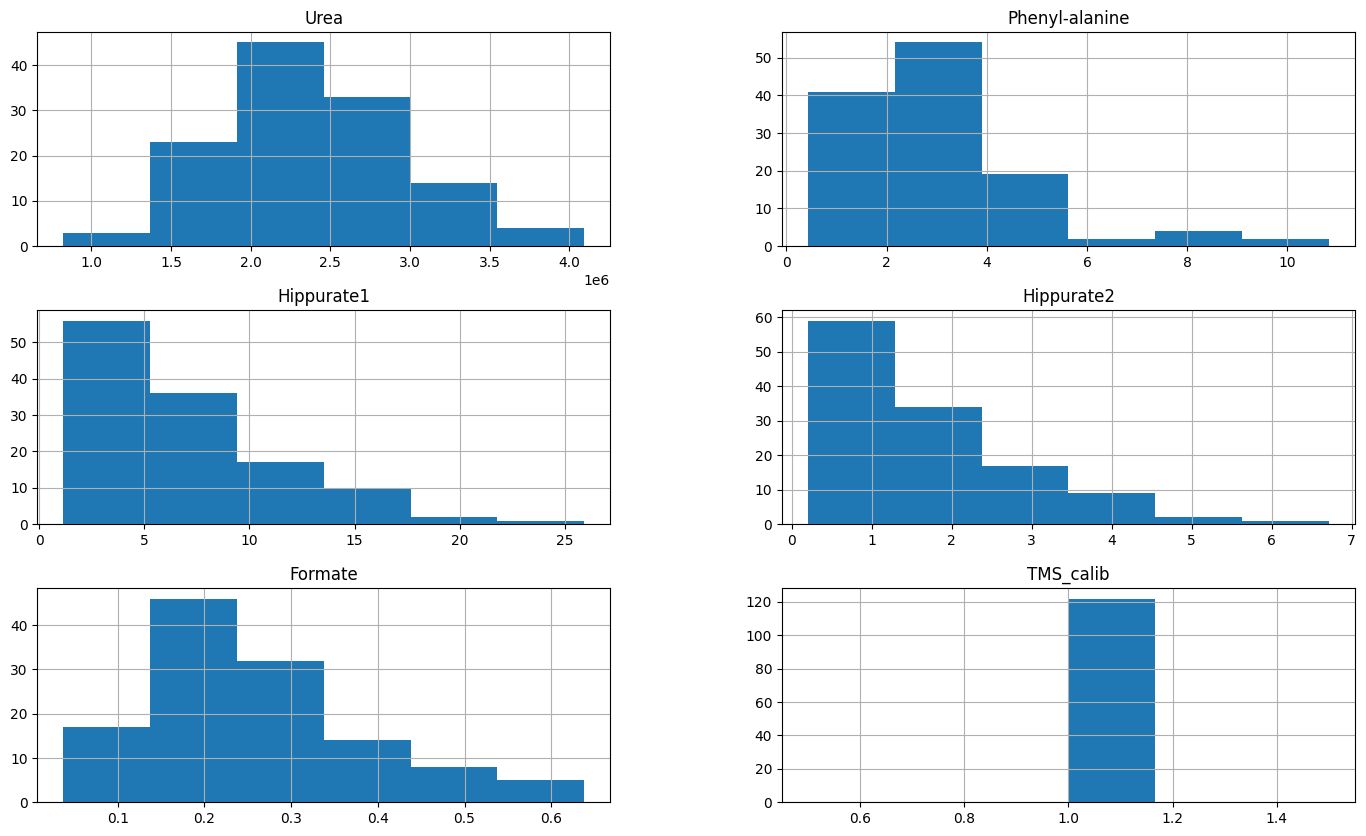

In [19]:
import matplotlib.pyplot as plt
import plotly.express as px
# Seaborn, useful for graphics
import seaborn as sns

#y=dados_totais.iloc[:,:]
hist =dados_totais.hist(bins=6,figsize=(17,10))#, density=True, stacked=True)
#fig = px.histogram(y, x=[1], barmode="group",  title=metabolitot, nbins=15, histnorm="percent",text_auto=True)
plt.show()

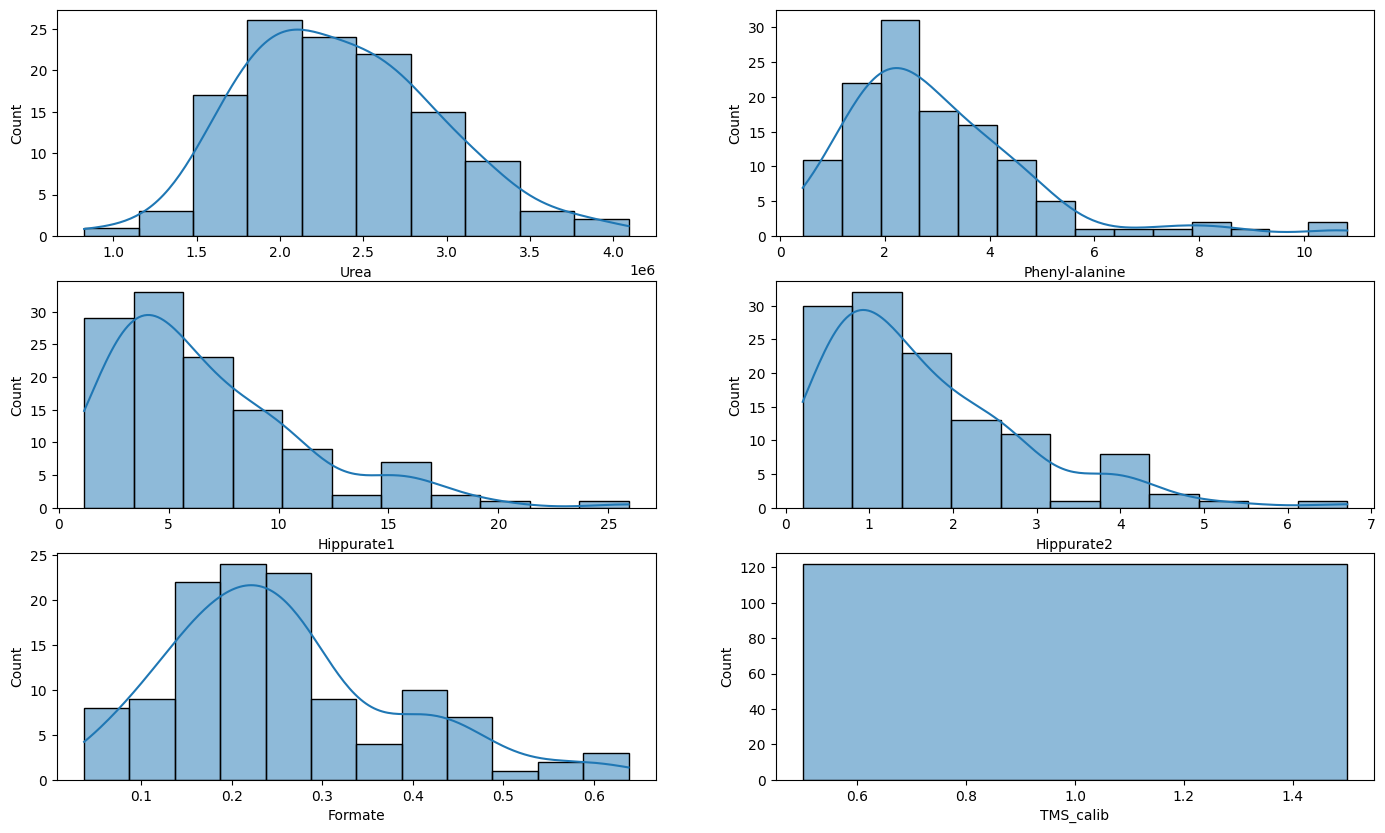

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
parcial=dados_totais
data = parcial  # Sample data
sns.color_palette("husl", 40)

num = parcial.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols
# create the figure and axes
fig, axes = plt.subplots(int((n+1)/2), 2,figsize=(17,10))
axes = axes.ravel()  # flattening the array makes indexing easier

#fig, axes = plt.subplots(20, 2)
#fig = plt.subplots(figsize=(20, 40))
#print(col)
# create subplots
#sns.histplot(data=dados_totais, x=col, color='r')
                         
                         
for col,ax in zip(num,axes):  # For each column...
    #print(ax)
    sns.histplot(dados_totais, x=str(col), kde=True, ax=ax) #sns.distplot(num[col], ax=ax)   # Plot histogaerm
    #plt.axvline(num[col].mean(), c='r', ax=ax)  # Plot mean



In [21]:
sns.__version__



'0.12.2'

In [22]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.10.7 (v3.10.7:6cc6b13308, Sep  5 2022, 14:02:52) [Clang 13.0.0 (clang-1300.0.29.30)]
Version info.
sys.version_info(major=3, minor=10, micro=7, releaselevel='final', serial=0)
